# Data exploration

Explore the housing data that was passed by the previous step.

The packages `orchest`, `matplotlib` and `sklearn` are included by default, i.e. you don't have to install the dependencies using `pip` for example.

In [2]:
from matplotlib import pyplot as plt
import orchest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Retrieve the data from the previous step.
data = orchest.get_inputs()
data, target = data["data"]

In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


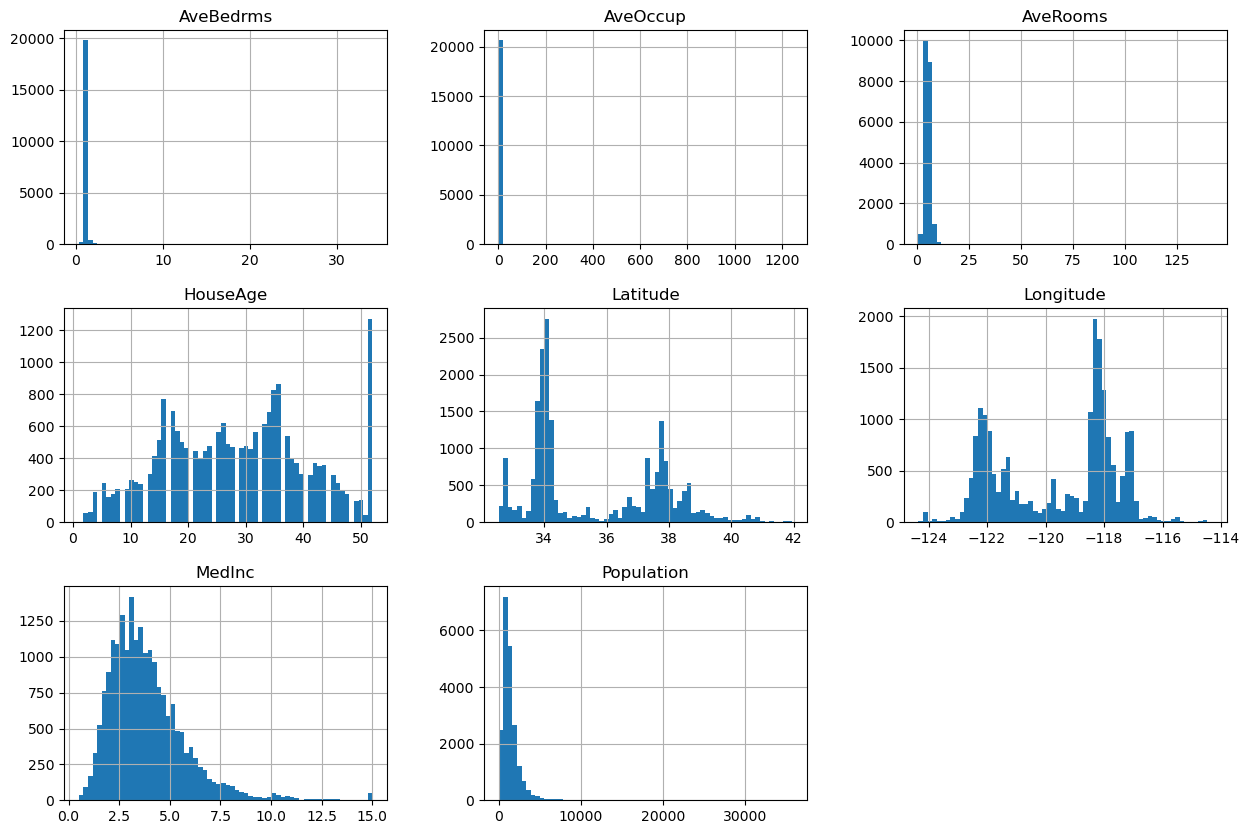

In [12]:
# Plot the counts for the different features to see how they are
# distributed.
plt.style.use('ggplot')
data.hist(bins=64, figsize=(15,10), layout=(3, 3))
plt.show()

### PCA
Let's use PCA to reduce the number of features to two, then plot with respect to the target feature.


In [8]:
# First, we scale the input features before we can use PCA.
X = data.values
X = StandardScaler().fit_transform(X)
y = target.values

In [9]:
# Run PCA over the features.
pca = PCA(n_components=2)
components = pca.fit_transform(X)

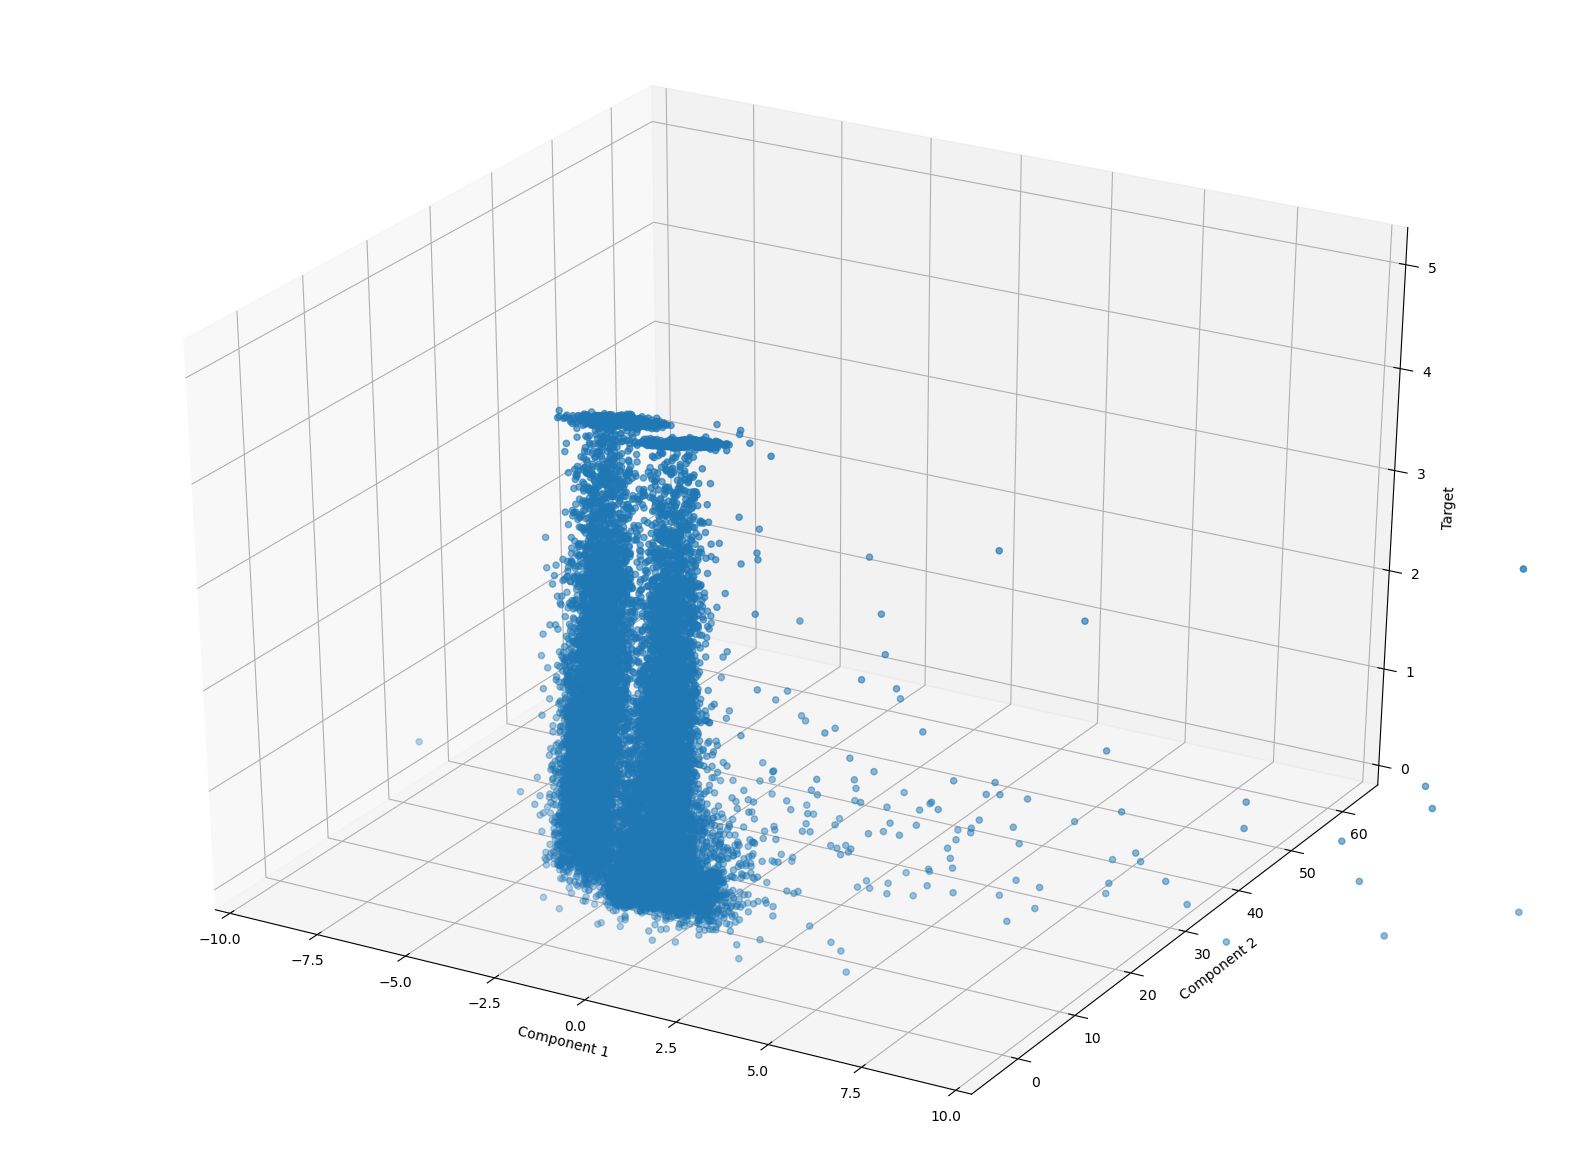

In [10]:
# Plot the principal components against the target feature.
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(components[:, 0], components[:, 1], y)
ax.set_xlim([-10, 10])

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Target')

plt.show()